# AWeSoMe Lab Intro and Setup Assignment Notebook

This is the Jupyter notebook for the HMC AWeSoMe Lab Intro and Setup Assignment "Hello, Convokit" ([writeup here](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?usp=sharing)). Solutions to coding questions _and_ written questions should be put here (you can use markdown cells for the written questions).

## Part 1: Load a Corpus!

See the [writeup for Part 1](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.yhpnne8a6ns3) before continuing.

In [3]:
from convokit import Corpus, download

In [4]:
reddit_corpus = Corpus(filename=download("reddit-corpus-small"))

Dataset already exists at /home/adeshong/.convokit/saved-corpora/reddit-corpus-small


In [5]:
reddit_corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


## Part 2: Re-implement print_summary_stats

See the [writeup for Part 2](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.jz5jp4t11fwd) before continuing.

In [6]:
# Here's how you would iterate over Speakers:
n_speakers = 0
for speaker in reddit_corpus.iter_speakers():
    n_speakers += 1
print(n_speakers)

119889


TASK: In the two code cells below, modify the provided code to count Utterances and Speakers.

In [7]:
n_utterances = 0
for utterance in reddit_corpus.iter_utterances():
    n_utterances += 1
print(n_utterances)

297132


In [8]:
n_conversations = 0
for conversation in reddit_corpus.iter_conversations():
    n_conversations += 1
print(n_conversations)

8286


## Part 3: Working with metadata

See the [writeup for Part 3](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ciwzim5uquvi) before continuing.

In [9]:
# Here's an example of accessing Conversation metadata
# (demonstrated on a randomly selected Conversation)
c = reddit_corpus.random_conversation()
print(c.meta["title"])

Fujifilm X-T3 has been announced!


TASK: Using conversation-level metadata and the iterators you practiced in Part 2, compute (a) the total number of subreddits in the Corpus, and (b) the 5 subreddits with the most conversations (along with the exact number of conversations in each of those 5 subreddits).

In [10]:
subreddits = {};
for c in reddit_corpus.iter_conversations():
    if c.meta["subreddit"] in subreddits:
        subreddits.update({c.meta["subreddit"]: subreddits[c.meta["subreddit"]]+1})
    else:
        subreddits[c.meta["subreddit"]] = 1

sortedSubreddits = sorted(subreddits, key = subreddits.get)

top5 = sortedSubreddits[-1:-6:-1]
for s in top5:
    print(s + ", " + str(subreddits[s]))
#print(sorted(subreddits, key = subreddits.get))
print("Number of subreddits: " + str(len(subreddits)))


funny, 100
teenagers, 99
techsupport, 98
pokemontrades, 98
hockey, 98
Number of subreddits: 100


## Part 4: Transformers, roll out!

See the [writeup for Part 4](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.lhawg1ufgxev) before continuing.

In [11]:
# Here's an example of applying a simple Transformation
# (the TextCleaner, which does basic text standardization such as lowercasing everything)
from convokit import TextCleaner
cleaner = TextCleaner(replace_text=False)
reddit_corpus = cleaner.transform(reddit_corpus)
utt = reddit_corpus.random_utterance()
print("Original text:", utt.text)
print("Cleaned text:", utt.meta["cleaned"])

100/297132 utterances processed
200/297132 utterances processed
300/297132 utterances processed
400/297132 utterances processed
500/297132 utterances processed
600/297132 utterances processed
700/297132 utterances processed
800/297132 utterances processed
900/297132 utterances processed
1000/297132 utterances processed
1100/297132 utterances processed
1200/297132 utterances processed
1300/297132 utterances processed
1400/297132 utterances processed
1500/297132 utterances processed
1600/297132 utterances processed
1700/297132 utterances processed
1800/297132 utterances processed
1900/297132 utterances processed
2000/297132 utterances processed
2100/297132 utterances processed
2200/297132 utterances processed
2300/297132 utterances processed
2400/297132 utterances processed
2500/297132 utterances processed
2600/297132 utterances processed
2700/297132 utterances processed
2800/297132 utterances processed
2900/297132 utterances processed
3000/297132 utterances processed
3100/297132 utteran

TASK: Use the [Fighting Words Transformer](https://convokit.cornell.edu/documentation/fightingwords.html) to generate a plot comparing the usage of words in the subreddits "nfl" and "programming".

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2533 valid corpus components. class2_func returned 3233 valid corpus components.
Vocab size is 1976
Comparing language...
ngram zscores computed.


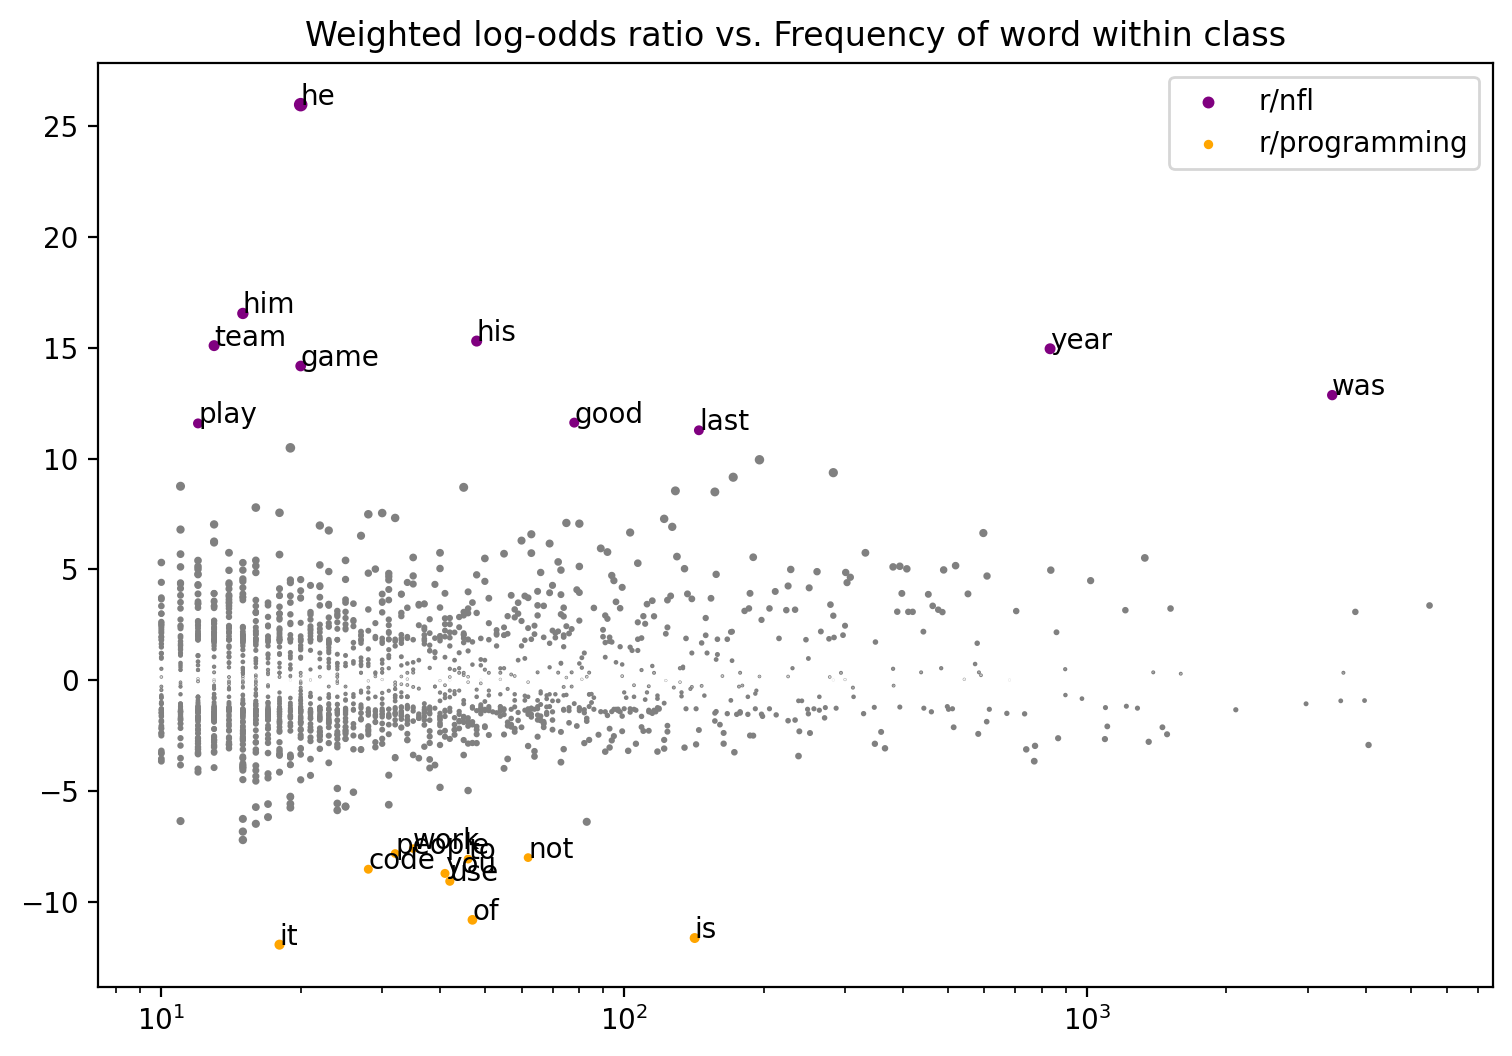

,z-score,class
ngram,,
it,-11.942379,r/programming
is,-11.643340,r/programming
of,-10.821973,r/programming
use,-9.079404,r/programming
you,-8.726617,r/programming
...,...,...
year,14.955275,r/nfl
team,15.096837,r/nfl
his,15.302508,r/nfl


In [12]:
from convokit import Corpus, download, FightingWords
fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "nfl", class2_func = lambda utt:utt.meta['subreddit'] == "programming",)
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/nfl', class2_name='r/programming')

df

## Part 5: Your turn!

See the [writeup for Part 5](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ep64m0asidvd) before continuing.

Before you write any code, please write down in this text cell what groups you have chosen to compare, and what hypotheses you came up with beforehand.

We are going to compare r/politics utterances with positive and negative post scores. We predict that the unigrams strongly associated with negative scores are associated with incivility and disagreement. In particular, we expect words associated with negative scores will show the cues of incivility discussed in "Thread With Caution" such as profanity, use of "you," etc.

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 368 valid corpus components. class2_func returned 4020 valid corpus components.
Vocab size is 1496
Comparing language...
ngram zscores computed.


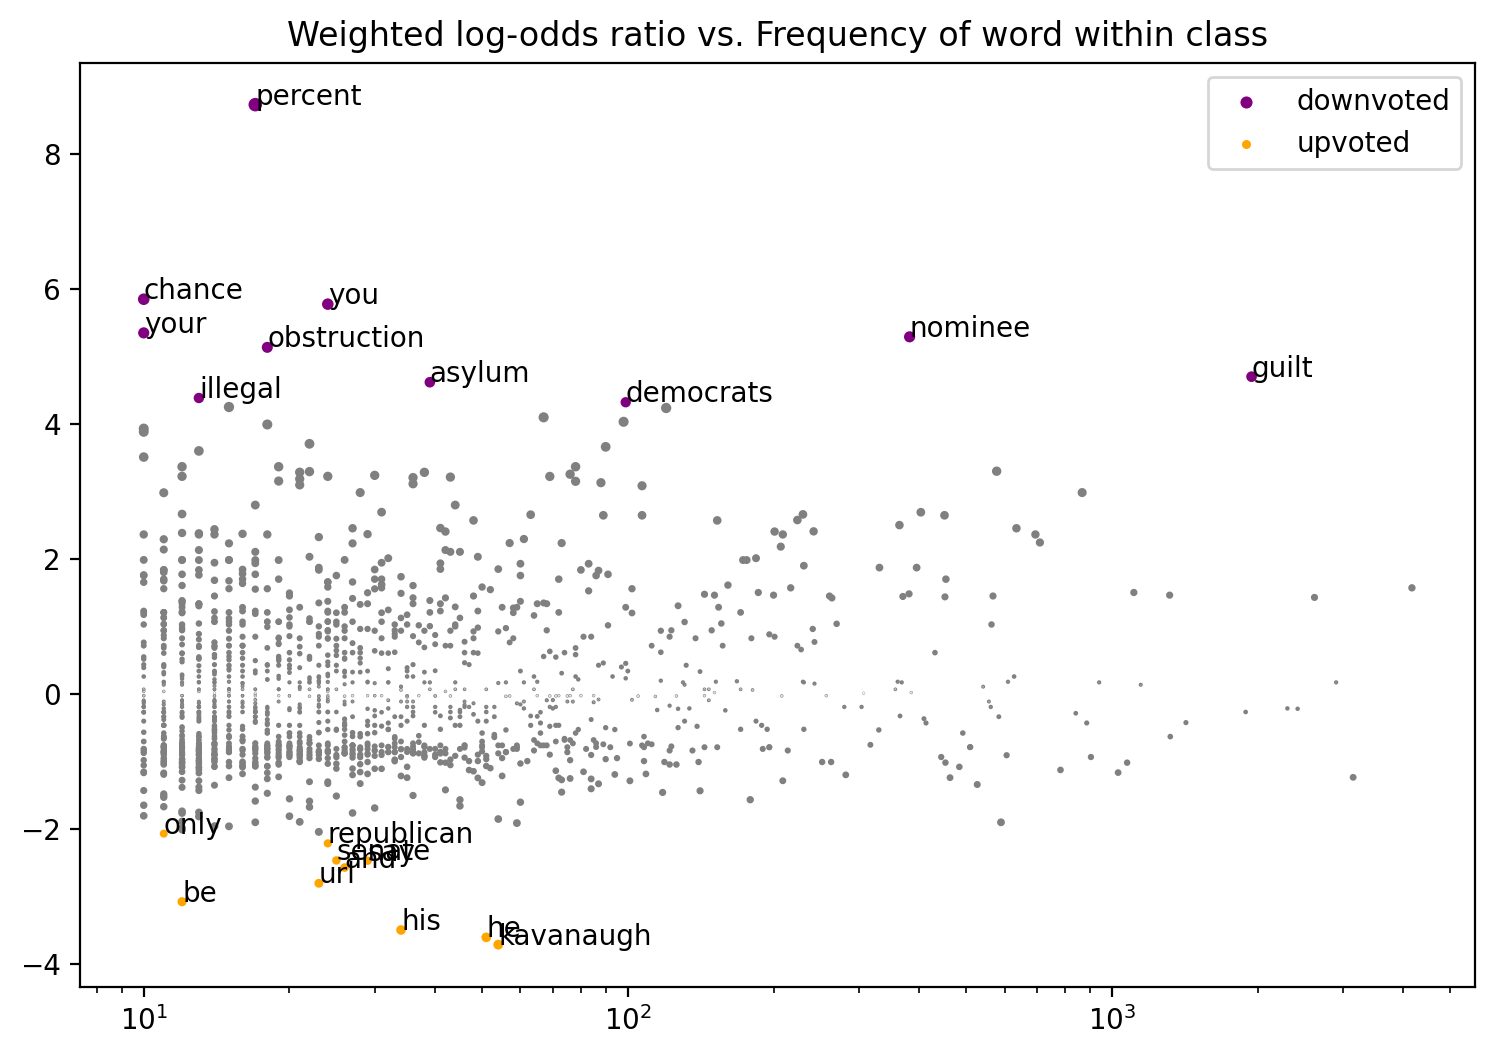

             z-score    class
ngram                        
kavanaugh  -3.717629  upvoted
he         -3.609752  upvoted
his        -3.500177  upvoted
be         -3.081209  upvoted
url        -2.807572  upvoted
and        -2.574800  upvoted
say        -2.473168  upvoted
senate     -2.469154  upvoted
republican -2.215712  upvoted
only       -2.071942  upvoted
state      -2.045780  upvoted
was        -2.010269  upvoted
probably   -1.991490  upvoted
in         -1.963365  upvoted
american   -1.960768  upvoted
judge      -1.915226  upvoted
means      -1.903630  upvoted
understand -1.903630  upvoted
anyone     -1.897183  upvoted
actually   -1.891156  upvoted
us         -1.855332  upvoted
gop        -1.817996  upvoted
ll         -1.813196  upvoted
life       -1.807327  upvoted
always     -1.766970  upvoted
term       -1.765519  upvoted
new        -1.755923  upvoted
will       -1.739424  upvoted
committee  -1.691529  upvoted
out        -1.677516  upvoted
supply     -1.672196  upvoted
else      

In [13]:
import pandas as pd

fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "politics" and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == "politics" and utt.meta['score']>0,)
df = fw.summarize(reddit_corpus, plot=True, class1_name='downvoted', class2_name='upvoted')

print(df.head(50))
print(df.tail(50))


Now write down in this text cell some things that you found. How did the results compare to your expectations? Was there anything that surprised you? Is there anything you would do differently?



Our hypothesis seems correct. "You" and "your" were strongly associated with downvotes, as was "bullshit" (an example of profanity which is associated with toxicity). Furthermore, "he", "his," and "us" were strongly associated with upvotes. 

Furthermore, several words associated with Republicans ("Republican," "GOP", "Kavanaugh") were associated with upvotes, and words associated with Democrats ("Clinton", "Sanders", "Democrats," "liberals") were associated with downvotes. Since r/politics leans very liberal, one possible explanation is that people of one party are more likely to discuss the other group with formal/group language (consider connotation of just "Sanders" vs. just "Bernie," which is warmer and less formal). This means that e.g. usage of "GOP" might arise more from Democrats and receive more upvotes as a result (since most people on the subreddit are Democrats), and usage of "liberals" might arise more from conservatives and receive more downvotes as as a result (since fewer people on the subreddit are conservative).

Just for fun we'll also look at r/Libertarian (but not draw any conclusions from it):

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 293 valid corpus components. class2_func returned 2500 valid corpus components.
Vocab size is 1425
Comparing language...
ngram zscores computed.


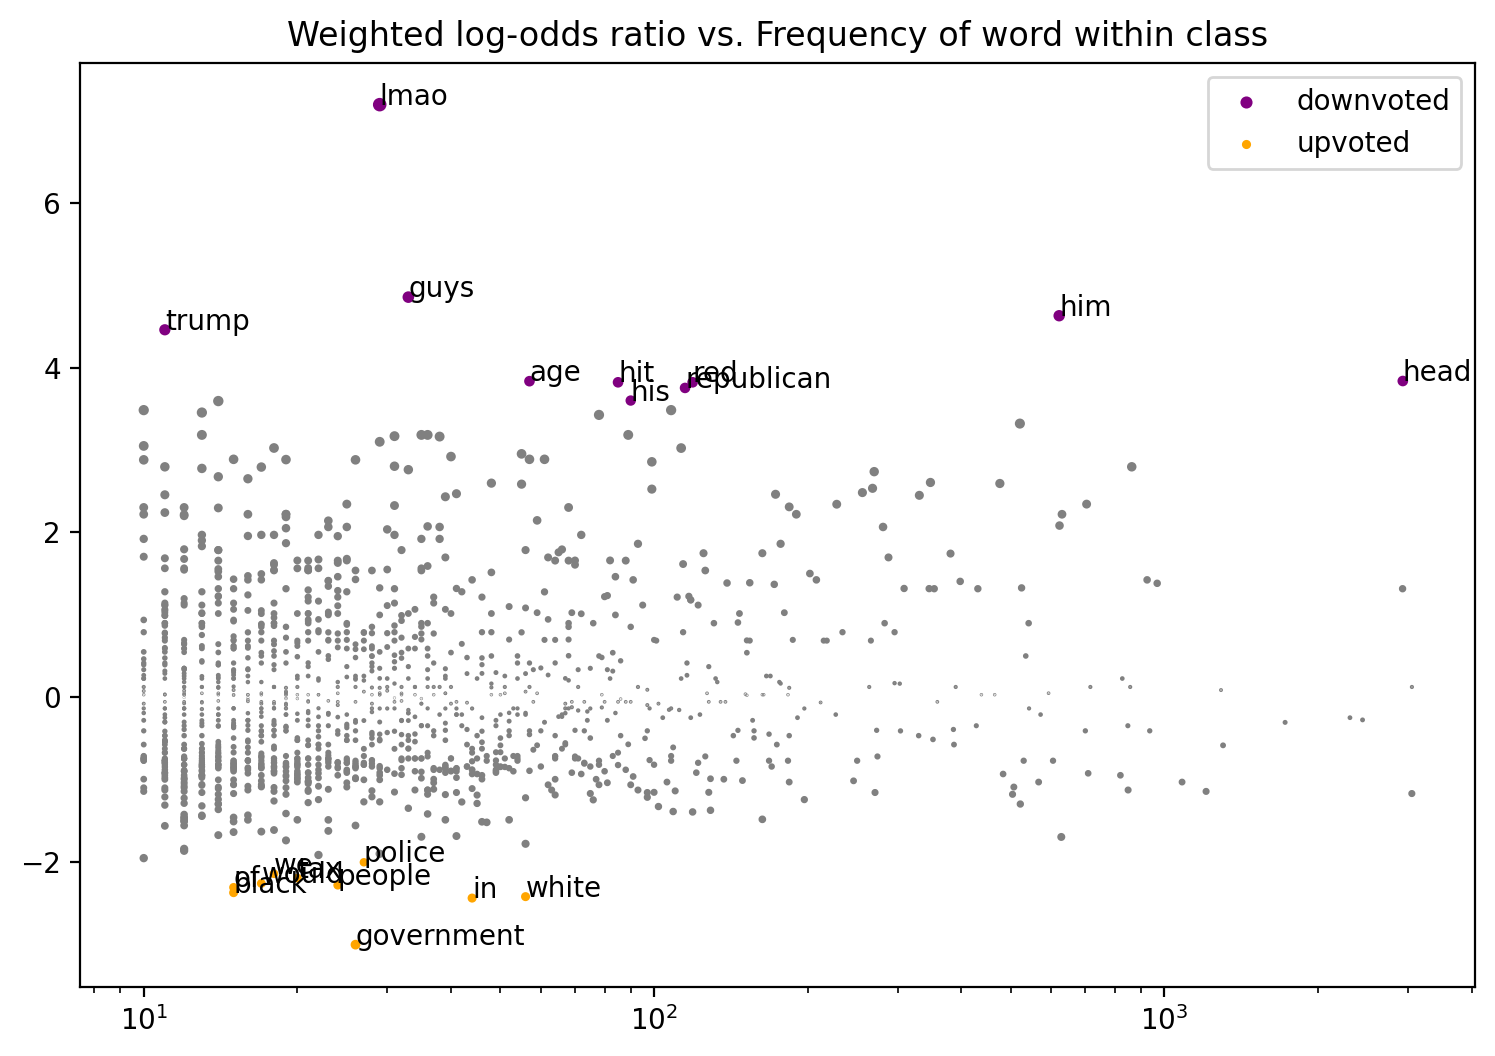

,z-score,class
ngram,,
government,-3.007956,upvoted
in,-2.442003,upvoted
white,-2.424586,upvoted
black,-2.376461,upvoted
of,-2.312480,upvoted
...,...,...
head,3.839931,downvoted
trump,4.462328,downvoted
him,4.633053,downvoted


In [14]:
fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "Libertarian" and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == "Libertarian" and utt.meta['score']>0,)
df = fw.summarize(reddit_corpus, plot=True, class1_name='downvoted', class2_name='upvoted')

df

**Day 2:**

Proper Noun Analysis

In [15]:

import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.5 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 368 valid corpus components. class2_func returned 4020 valid corpus components.
Vocab size is 1314
Comparing language...
ngram zscores computed.


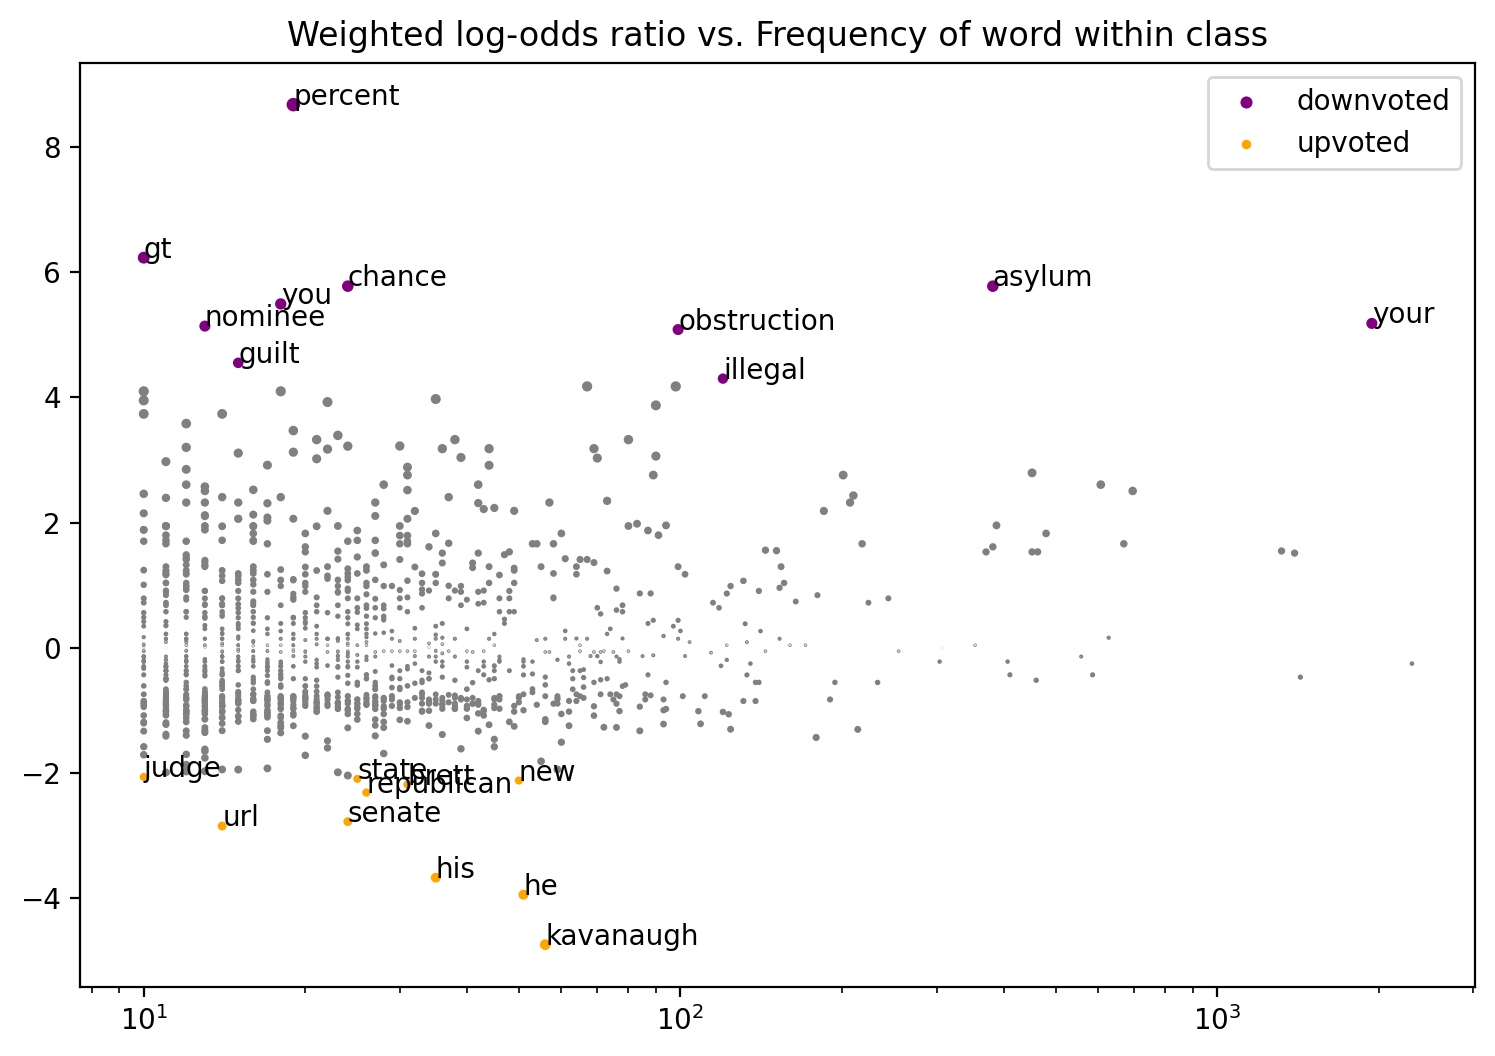

              z-score    class
ngram                         
kavanaugh   -4.737850  upvoted
he          -3.940602  upvoted
his         -3.669303  upvoted
url         -2.844000  upvoted
senate      -2.774041  upvoted
republican  -2.310087  upvoted
brett       -2.182031  upvoted
new         -2.118062  upvoted
state       -2.091895  upvoted
judge       -2.060227  upvoted
probably    -2.037537  upvoted
american    -1.988366  upvoted
it          -1.986753  upvoted
allegations -1.973883  upvoted
actually    -1.969718  upvoted
gop         -1.943117  upvoted
understand  -1.941521  upvoted
means       -1.941521  upvoted
anyone      -1.923622  upvoted
life        -1.864914  upvoted
term        -1.810698  upvoted
committee   -1.756591  upvoted
who         -1.716239  upvoted
got         -1.706570  upvoted
supply      -1.699576  upvoted
people      -1.687265  upvoted
him         -1.650561  upvoted
kind        -1.618457  upvoted
removed     -1.611560  upvoted
documents   -1.597170  upvoted
exactly 

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

def filter(utterance):
    doc = nlp(utterance.text)
    filtered_tokens = [token.text for token in doc if (not token.is_stop or token.pos_ == "PRON")]
    cleaned_utterance = ""
    for token in filtered_tokens:
        cleaned_utterance = cleaned_utterance + " " + token
    utterance.text = cleaned_utterance

for utterance in reddit_corpus.iter_utterances():
    if utterance.meta["subreddit"] == "politics":
        filter(utterance)

fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "politics" and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == "politics" and utt.meta['score']>0,)
df = fw.summarize(reddit_corpus, plot=True, class1_name='downvoted', class2_name='upvoted')

print(df.head(50))
print(df.tail(50))




                

Initializing default CountVectorizer with ngram_range (1, 2)... Done.
class1_func returned 368 valid corpus components. class2_func returned 4020 valid corpus components.
Vocab size is 99
Comparing language...
ngram zscores computed.


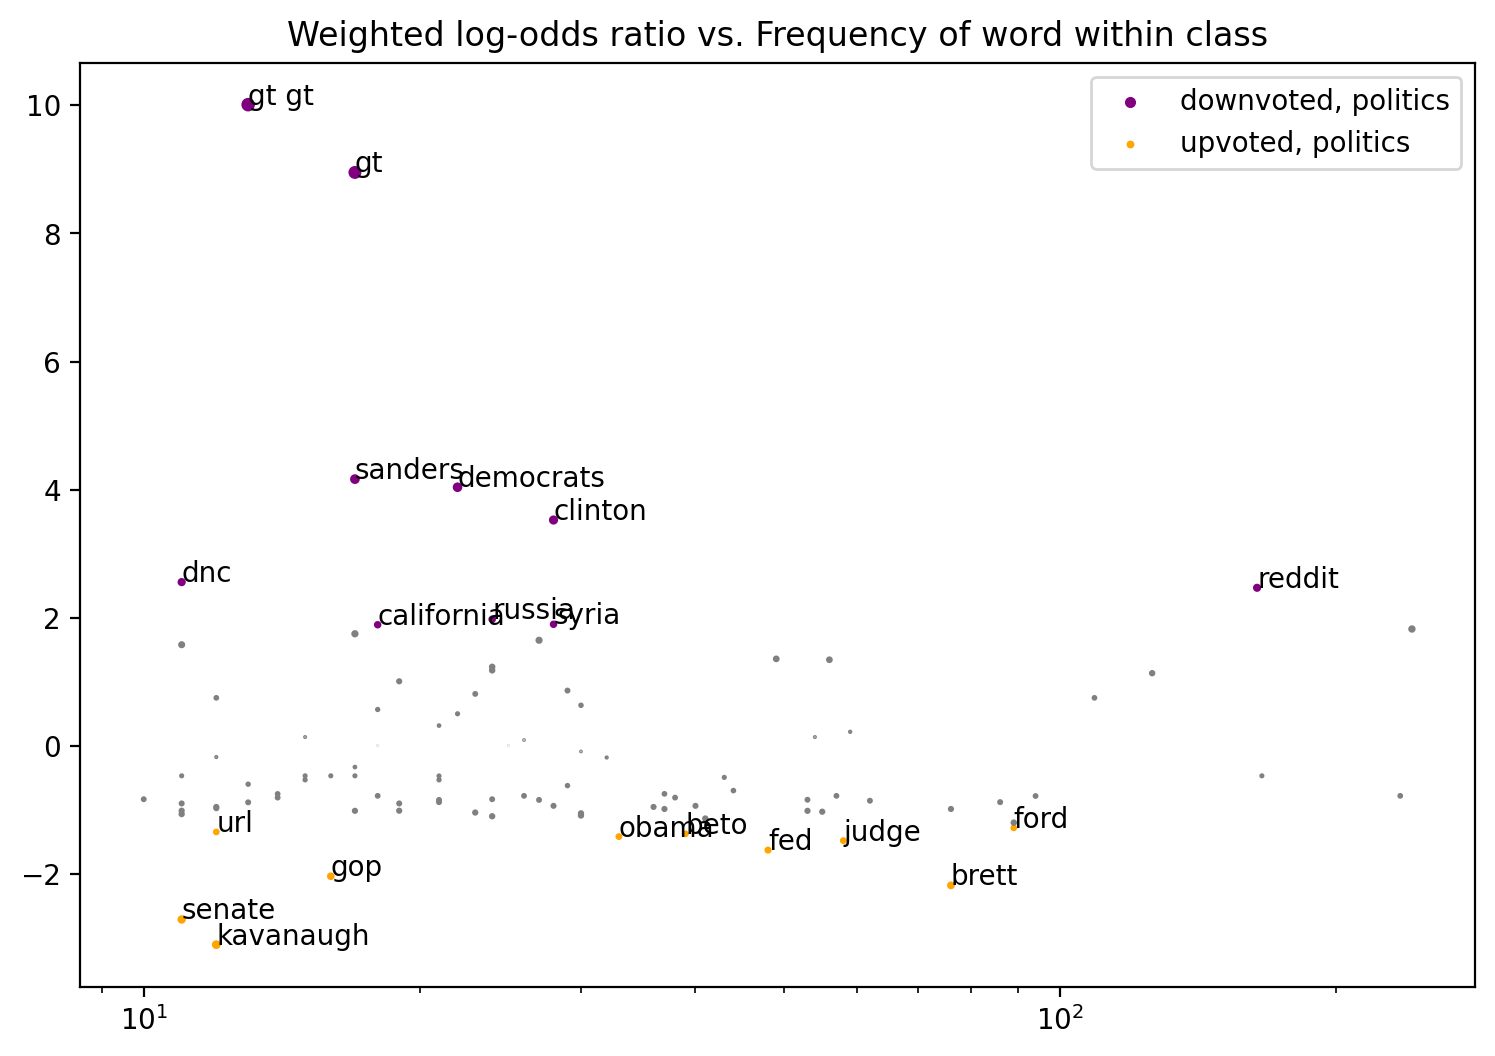

                      z-score              class
ngram                                           
kavanaugh           -3.109339  upvoted, politics
senate              -2.715705  upvoted, politics
brett               -2.183407  upvoted, politics
gop                 -2.040869  upvoted, politics
fed                 -1.632057  upvoted, politics
judge               -1.484506  upvoted, politics
obama               -1.421553  upvoted, politics
beto                -1.378090  upvoted, politics
url                 -1.348456  upvoted, politics
ford                -1.285743  upvoted, politics
brett kavanaugh     -1.203371  upvoted, politics
avenatti            -1.139691  upvoted, politics
new                 -1.103488  upvoted, politics
republican          -1.092012  upvoted, politics
federal             -1.069870  upvoted, politics
november            -1.057836  upvoted, politics
news                -1.045334  upvoted, politics
fox                 -1.032326  upvoted, politics
reserve             

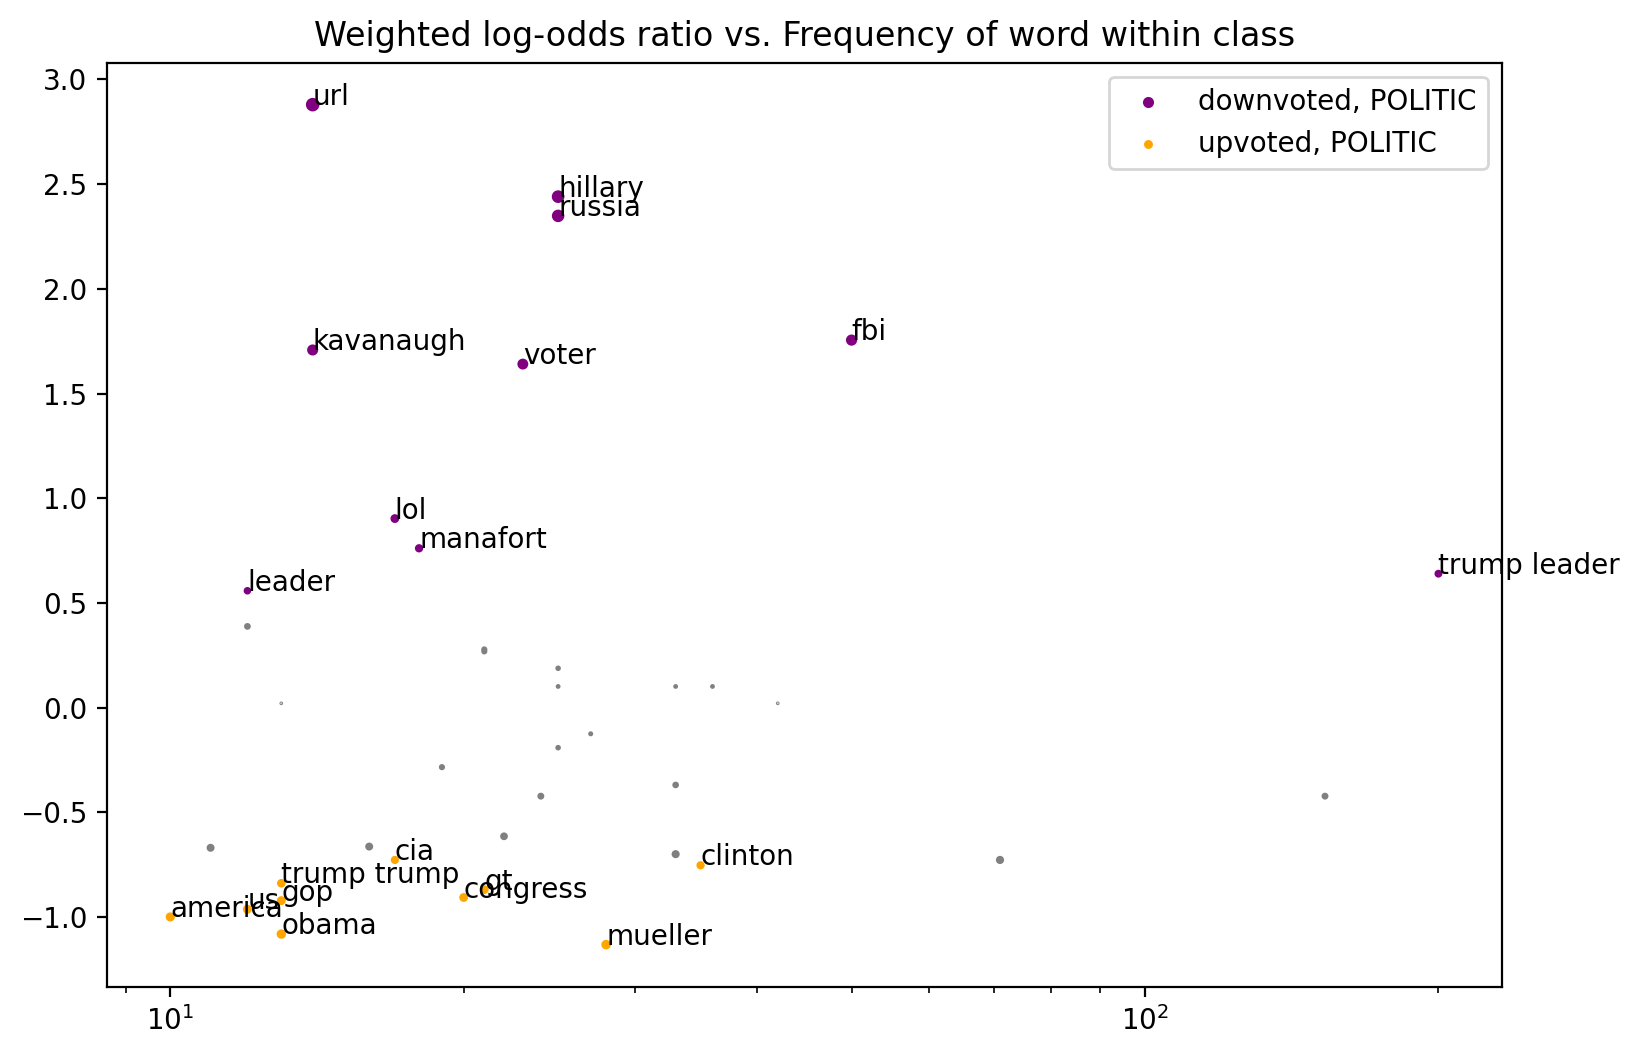

               z-score               class
ngram                                     
mueller      -1.130984    upvoted, POLITIC
obama        -1.080510    upvoted, POLITIC
america      -0.998754    upvoted, POLITIC
us           -0.962072    upvoted, POLITIC
gop          -0.920814    upvoted, POLITIC
congress     -0.905829    upvoted, POLITIC
gt           -0.868395    upvoted, POLITIC
trump trump  -0.837944    upvoted, POLITIC
clinton      -0.752151    upvoted, POLITIC
cia          -0.726633    upvoted, POLITIC
sessions     -0.726633    upvoted, POLITIC
garland      -0.698933    upvoted, POLITIC
bush         -0.668641    upvoted, POLITIC
trump        -0.662710    upvoted, POLITIC
republicans  -0.613719    upvoted, POLITIC
russians     -0.422118    upvoted, POLITIC
senate       -0.422118    upvoted, POLITIC
cohen        -0.368603    upvoted, POLITIC
president    -0.283645    upvoted, POLITIC
dems         -0.190687    upvoted, POLITIC
god          -0.124465    upvoted, POLITIC
voters     

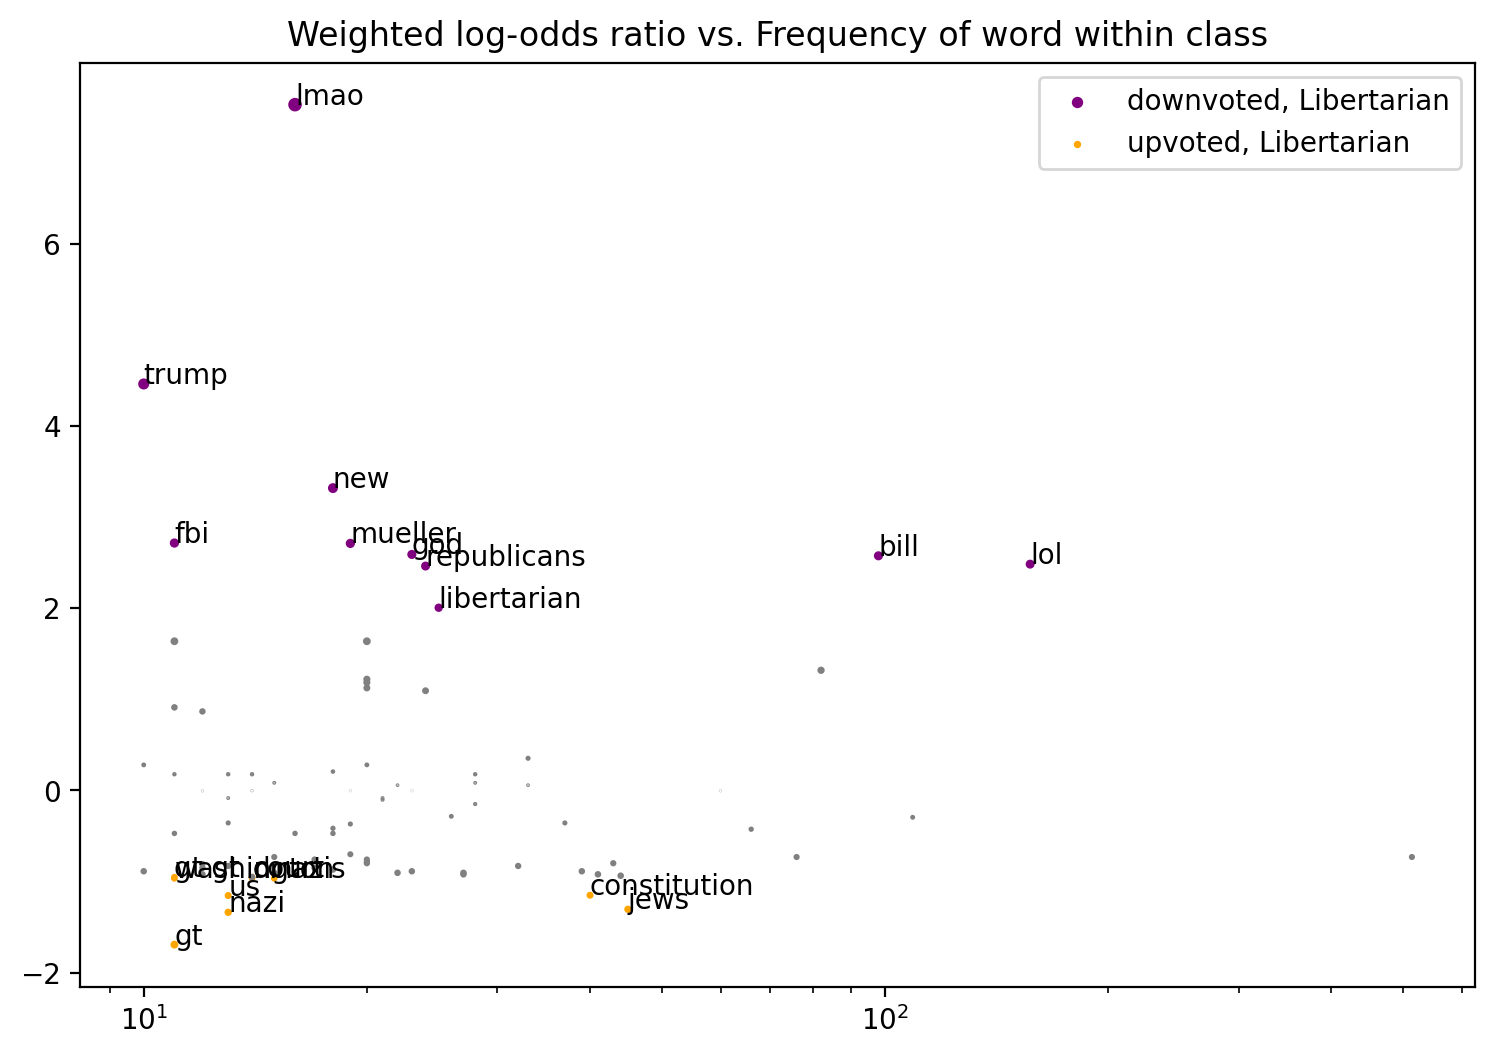

                  z-score                 class
ngram                                          
gt              -1.691471  upvoted, Libertarian
nazi            -1.336575  upvoted, Libertarian
jews            -1.303256  upvoted, Libertarian
us              -1.152432  upvoted, Libertarian
constitution    -1.149381  upvoted, Libertarian
nazis           -0.964203  upvoted, Libertarian
washington      -0.964203  upvoted, Libertarian
dr              -0.964203  upvoted, Libertarian
gt gt           -0.950457  upvoted, Libertarian
court           -0.950020  upvoted, Libertarian
post            -0.950020  upvoted, Libertarian
medicare        -0.935184  upvoted, Libertarian
supreme court   -0.919632  upvoted, Libertarian
supreme         -0.919632  upvoted, Libertarian
germany         -0.919632  upvoted, Libertarian
johnson         -0.903291  upvoted, Libertarian
nfl             -0.903291  upvoted, Libertarian
washington post -0.903291  upvoted, Libertarian
jews jews       -0.886077  upvoted, Libe

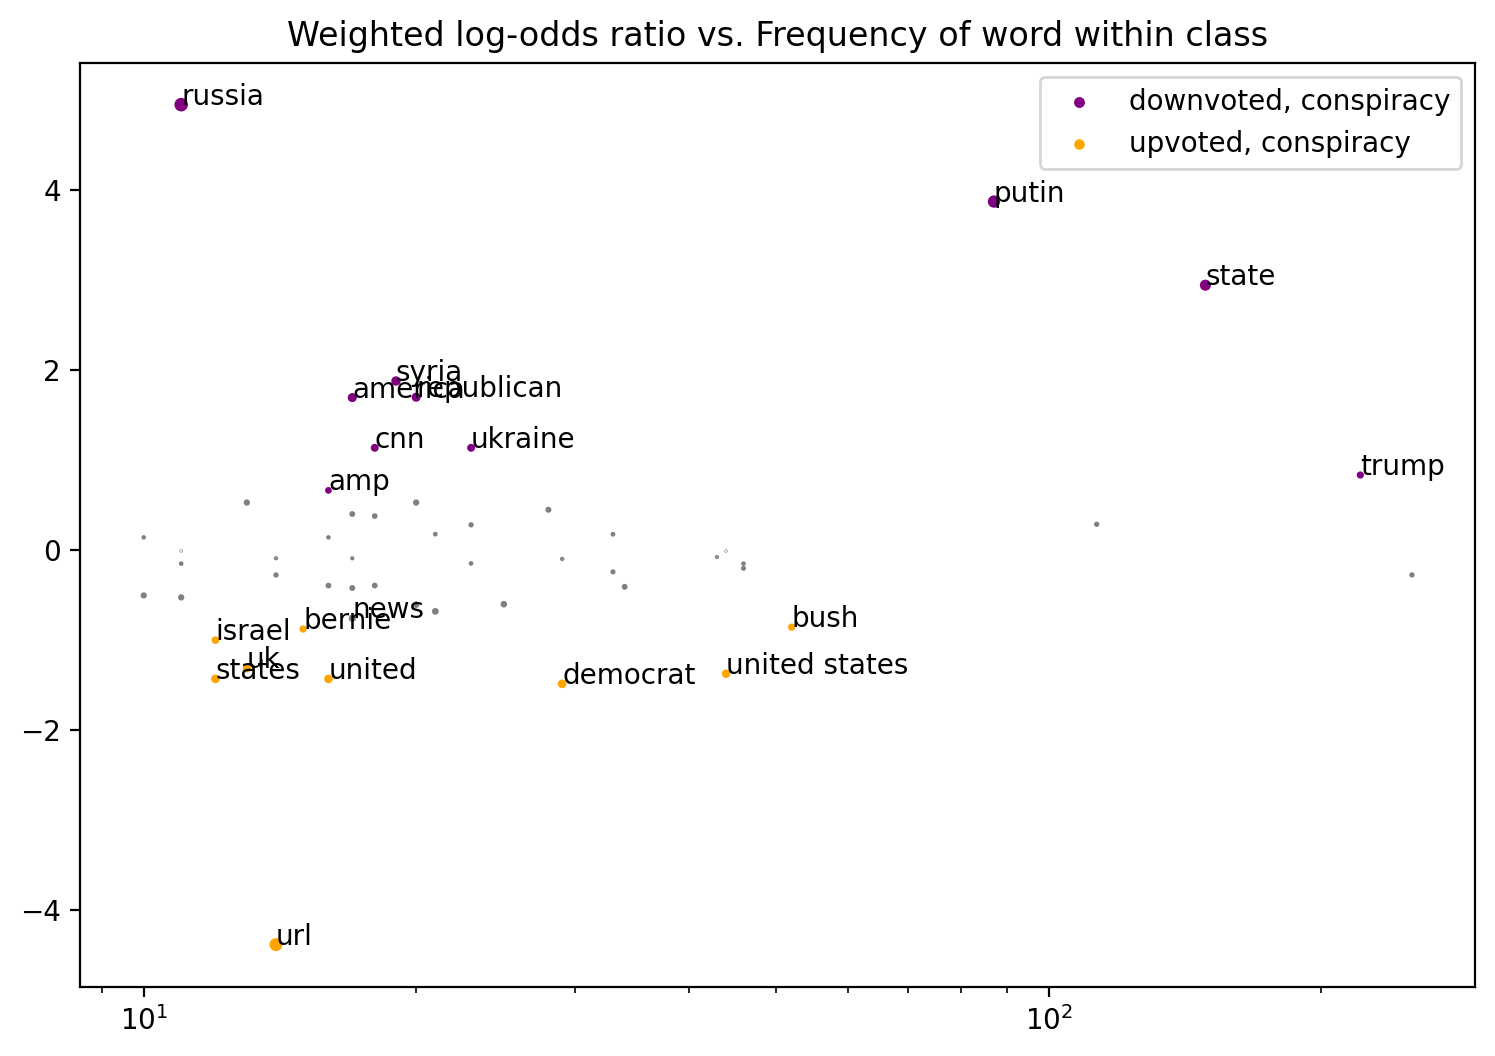

                z-score                  class
ngram                                         
url           -4.390100    upvoted, conspiracy
democrat      -1.491125    upvoted, conspiracy
states        -1.436389    upvoted, conspiracy
united        -1.436389    upvoted, conspiracy
united states -1.378802    upvoted, conspiracy
uk            -1.318053    upvoted, conspiracy
israel        -1.005501    upvoted, conspiracy
bernie        -0.881662    upvoted, conspiracy
bush          -0.860793    upvoted, conspiracy
news          -0.762295    upvoted, conspiracy
youtube       -0.762295    upvoted, conspiracy
republicans   -0.685734    upvoted, conspiracy
fisa          -0.611369    upvoted, conspiracy
fbi           -0.606019    upvoted, conspiracy
reddit        -0.530391    upvoted, conspiracy
cia           -0.508520    upvoted, conspiracy
mueller       -0.425286    upvoted, conspiracy
democrats     -0.412789    upvoted, conspiracy
google        -0.398544    upvoted, conspiracy
al           

In [46]:
import spacy
nlp = spacy.load("en_core_web_sm")


def prop_noun_analysis(subredditTitle): 
    reddit_prop_corpus = reddit_corpus

    def filter_pn(utterance):
        doc = nlp(utterance.text)
        filtered_tokens = [token.text for token in doc if (token.pos_ == "PROPN")]
        cleaned_utterance = ""
        for token in filtered_tokens:
            cleaned_utterance = cleaned_utterance + " " + token
        utterance.text = cleaned_utterance

    for utterance in reddit_prop_corpus.iter_utterances():
        if utterance.meta["subreddit"] == subredditTitle:
            filter_pn(utterance)

    fw = FightingWords(ngram_range=(1,2))
    fw.fit(reddit_prop_corpus, class1_func = lambda utt: utt.meta['subreddit'] == subredditTitle and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == subredditTitle and utt.meta['score']>0,)
    df2 = fw.summarize(reddit_prop_corpus, plot=True, class1_name="downvoted, " + subredditTitle, class2_name="upvoted, " + subredditTitle)

    print(df2.head(50))
    print(df2.tail(50))

prop_noun_analysis("politics")
prop_noun_analysis("POLITIC")
prop_noun_analysis("Libertarian")
prop_noun_analysis("conspiracy")

In [ ]:
import pandas as pd
import spacy
from scipy.stats import sem
import statistics
import math

vad_df = pd.read_csv("NRC-VAD-Lexicon-v2.1.txt", sep="\t")
vad_df.set_index('term', inplace=True)
nlp = spacy.load("en_core_web_sm")

neg_vals = []
neg_aros = []
neg_doms = []

pos_vals = []
pos_aros = []
pos_doms = []

def avg_vad(utterance):
  vals, aros, doms = [], [], []
  doc = nlp(utterance.text)
  for token in doc:
    token = token.text.lower()
    if token in vad_df.index:
      row = vad_df.loc[token]
      vals.append(row['valence'])
      aros.append(row['arousal'])
      doms.append(row['dominance'])
      
  if utterance.meta['score'] < 0:
    if len(vals) > 0 and len(aros) > 0 and len(doms) > 0:
      neg_vals.append(sum(vals)/len(vals))
      neg_aros.append(sum(aros)/len(aros))
      neg_doms.append(sum(doms)/len(doms))
  else:
    if len(vals) > 0 and len(aros) > 0 and len(doms) > 0:
      pos_vals.append(sum(vals)/len(vals))
      pos_aros.append(sum(aros)/len(aros))
      pos_doms.append(sum(doms)/len(doms))


def filter_vad(utterance):
  doc = nlp(utterance.text)
  for token in doc:
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    cleaned_utterance = ""
    for token in filtered_tokens:
      cleaned_utterance = cleaned_utterance + " " + token
      utterance.text = cleaned_utterance
  avg_vad(utterance)

for utterance in reddit_corpus.iter_utterances():
  if utterance.meta["subreddit"] == "politics":
    filter_vad(utterance)


print("Positive-score averages:")
print(sum(pos_vals)/len(pos_vals))
print("Valence standard error:")
print(statistics.stdev(pos_vals)/math.sqrt(len(pos_vals)))
print(sum(pos_aros)/len(pos_aros))
print("Arousal standard error:")
print(statistics.stdev(pos_aros)/math.sqrt(len(pos_aros)))
print(sum(pos_doms)/len(pos_doms))
print("Dominance standard error:")
print(statistics.stdev(pos_doms)/math.sqrt(len(pos_doms)))

print("Negative-score averages:")
print(sum(neg_vals)/len(neg_vals))
print("Valence standard error:")
print(statistics.stdev(neg_vals)/math.sqrt(len(neg_vals)))
print(sum(neg_aros)/len(neg_aros))
print("Arousal standard error:")
print(statistics.stdev(neg_aros)/math.sqrt(len(neg_aros)))
print(sum(neg_doms)/len(neg_doms))
print("Dominance standard error:")
print(statistics.stdev(neg_doms)/math.sqrt(len(neg_doms)))

Positive-score averages:
0.06758701830018457
Valence standard error:
0.005017904992119929
-0.07437093309784161
Arousal standard error:
0.003945433986627273
0.07974237368096247
Dominance standard error:
0.0036067269238175726
Negative-score averages:
0.02831458993168284
Valence standard error:
0.016419364445815
-0.07809739426378651
Arousal standard error:
0.013807435542737041
0.07787289152589656
Dominance standard error:
0.012291990422654877


<ErrorbarContainer object of 3 artists>

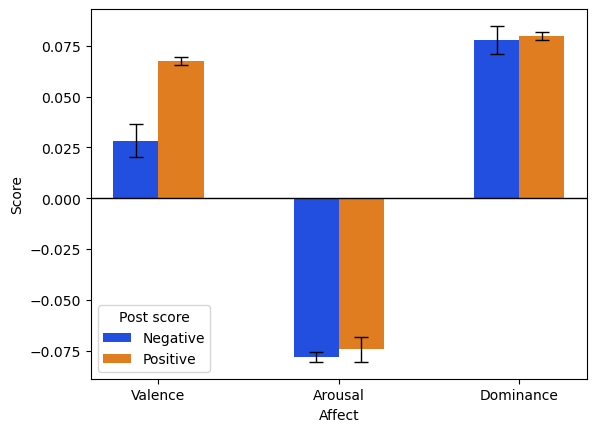

In [ ]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


vad = [['Negative', 0.02831, -0.0781, 0.07787 ], ['Positive', 0.067587, -0.07437, 0.0797423]]
error = [['Negative', 0.0164, 0.01381, 0.01229], ['Positive', 0.00502, 0.003945, 0.0036]]

vad_df = pd.DataFrame(vad, columns=['Post score', 'Valence', 'Arousal', 'Dominance'])
error_df = pd.DataFrame(error, columns=['Post score', 'Valence', 'Arousal', 'Dominance'])
vad_melted = vad_df.melt(id_vars='Post score', var_name='Affect', value_name='Score')
error_melted = error_df.melt(id_vars='Post score', var_name='Affect', value_name='Error')
fig_df = pd.merge(vad_melted, error_melted, on=['Post score', 'Affect'])

plt.figure()
ax = sns.barplot(x='Affect', y='Score', hue='Post score', palette="bright", data=fig_df, width=0.5)
ax.axhline(y=0, color='black', linewidth=1)

bars = ax.patches

ax.errorbar(bars[0].get_x()+bars[0].get_width()/2, fig_df['Score'].iloc[0], yerr=fig_df['Error'].iloc[0]/2, color='black', capsize=5, elinewidth=1)
ax.errorbar(bars[1].get_x()+bars[1].get_width()/2, fig_df['Score'].iloc[2], yerr=fig_df['Error'].iloc[1]/2, color='black', capsize=5, elinewidth=1)
ax.errorbar(bars[2].get_x()+bars[2].get_width()/2, fig_df['Score'].iloc[4], yerr=fig_df['Error'].iloc[2]/2, color='black', capsize=5, elinewidth=1)
ax.errorbar(bars[3].get_x()+bars[3].get_width()/2, fig_df['Score'].iloc[1], yerr=fig_df['Error'].iloc[3]/2, color='black', capsize=5, elinewidth=1)
ax.errorbar(bars[4].get_x()+bars[4].get_width()/2, fig_df['Score'].iloc[3], yerr=fig_df['Error'].iloc[4]/2, color='black', capsize=5, elinewidth=1)
ax.errorbar(bars[5].get_x()+bars[5].get_width()/2, fig_df['Score'].iloc[5], yerr=fig_df['Error'].iloc[5]/2, color='black', capsize=5, elinewidth=1)




**Day 3:**

In [20]:
pos = [utt for utt in reddit_corpus.iter_utterances() if utt.meta['subreddit']=='politics' and utt.meta['score']>0]
neg = [utt for utt in reddit_corpus.iter_utterances() if utt.meta['subreddit']=='politics' and utt.meta['score']<0]

pos_corpus = Corpus(utterances=pos)
neg_corpus = Corpus(utterances=neg)


4020/4020 utterances processed


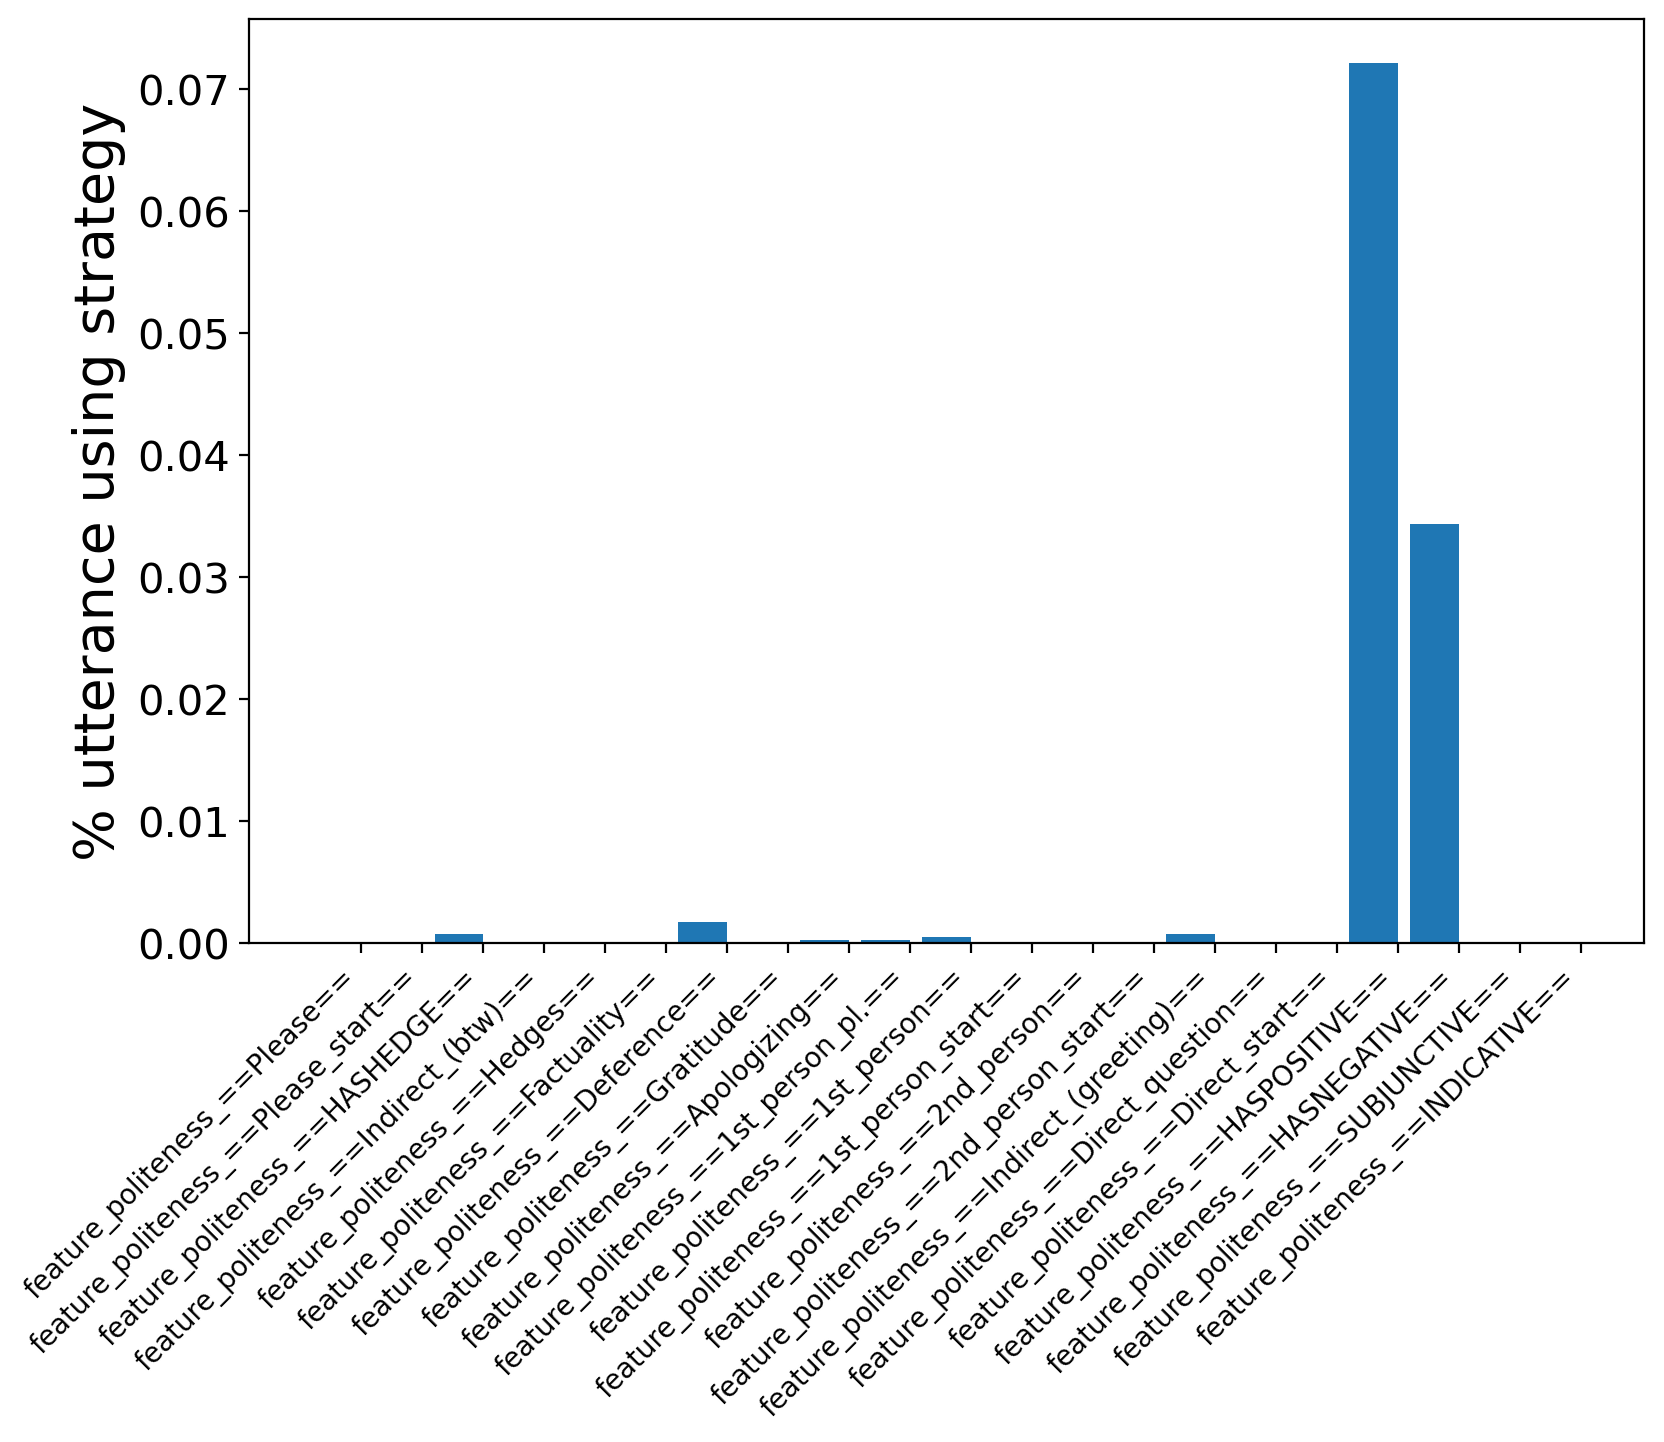

368/368 utterances processed


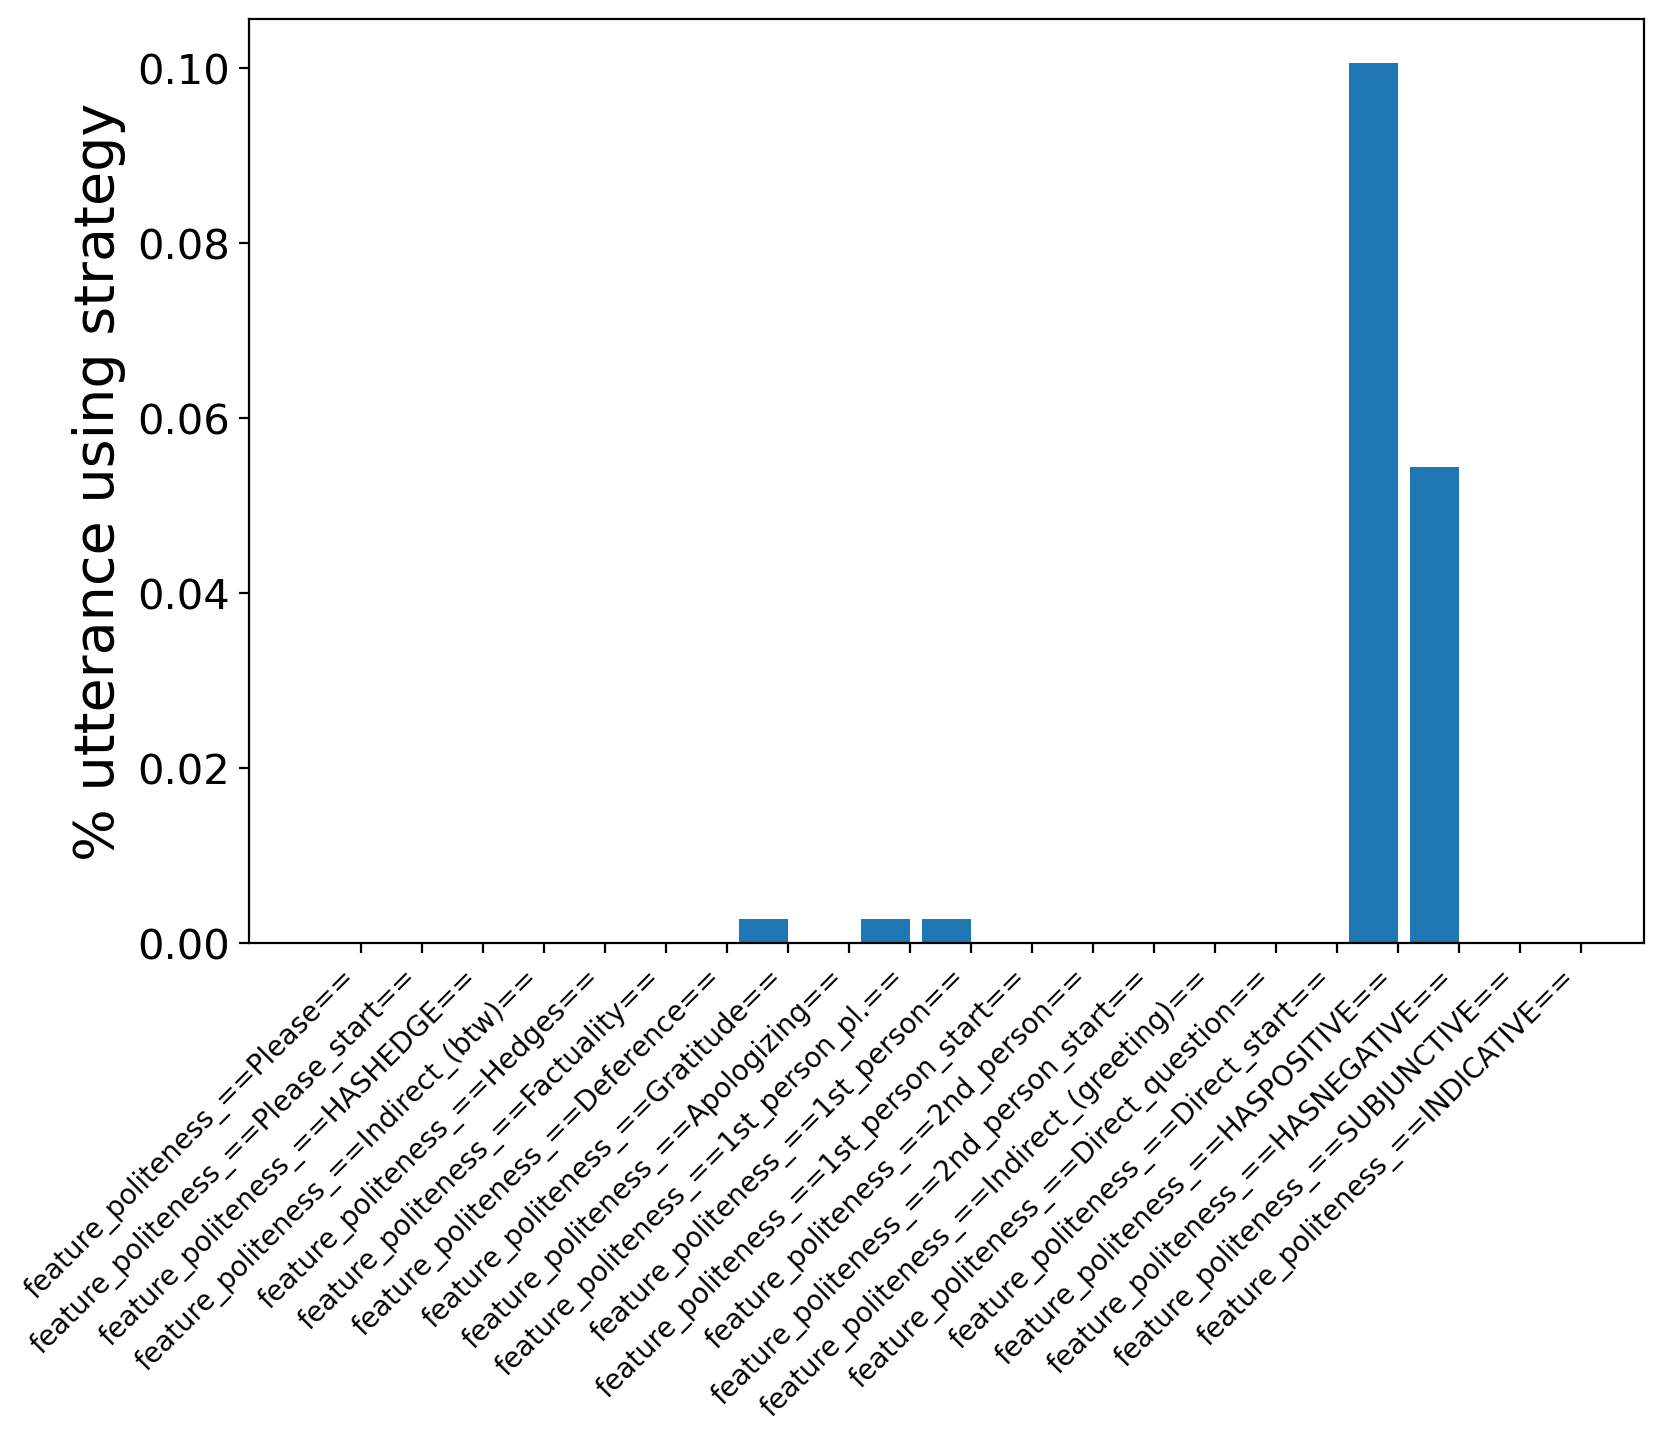

'"\n\nspacy_nlp = spacy.load(\'en_core_web_sm\', disable=[\'ner\'])\nquery3 = lambda x : x.meta[\'subreddit\'] == \'politics\'\n\nparser = TextParser(verbosity=1000, input_filter=query3)\nreddit_corpus = parser.transform(reddit_corpus)\n\nps = PolitenessStrategies()\nreddit_corpus = ps.transform(reddit_corpus, markers=True, selector=query3)\nquery1 = lambda x : x.meta[\'subreddit\'] == \'politics\' and x.meta[\'score\']>0\n\nquery2 = lambda x : x.meta[\'subreddit\'] == \'politics\' and x.meta[\'score\']<0\n\nround(upvoted - downvoted, 2)\n\nimport pandas as pd\n\np_df_feat = ps._get_feat_df(reddit_corpus, query1)\np_df_numeric = p_df_feat.select_dtypes(include=\'number\')\np_proportions = p_df_numeric.sum(axis=0) * 297132 / (len(p_df_numeric) * 4020)\np_proportions.plot(kind=\'bar\')\n\n\nn_df_feat = ps._get_feat_df(reddit_corpus, query1)\nn_df_numeric = n_df_feat.select_dtypes(include=\'number\')\nn_proportions = n_df_numeric.sum(axis=0) * 297132 / (len(n_df_numeric) * 368)\nn_proport

In [21]:
import spacy
from convokit import Corpus, Speaker, Utterance
from convokit import download
from convokit import TextParser
from convokit import PolitenessStrategies
spacy_nlp = spacy.load('en_core_web_sm', disable=['ner'])

pos_parser = TextParser(verbosity=10000)
pos_corpus = pos_parser.transform(pos_corpus)
ps = PolitenessStrategies()
pos_corpus = ps.transform(pos_corpus, markers=True)
pos_data = ps.summarize(pos_corpus, plot=True)

neg_parser = TextParser(verbosity=10000)
neg_corpus = neg_parser.transform(neg_corpus)
neg_corpus = ps.transform(neg_corpus, markers=True)
neg_data = ps.summarize(neg_corpus, plot=True)


""""

spacy_nlp = spacy.load('en_core_web_sm', disable=['ner'])
query3 = lambda x : x.meta['subreddit'] == 'politics'

parser = TextParser(verbosity=1000, input_filter=query3)
reddit_corpus = parser.transform(reddit_corpus)

ps = PolitenessStrategies()
reddit_corpus = ps.transform(reddit_corpus, markers=True, selector=query3)
query1 = lambda x : x.meta['subreddit'] == 'politics' and x.meta['score']>0

query2 = lambda x : x.meta['subreddit'] == 'politics' and x.meta['score']<0

round(upvoted - downvoted, 2)

import pandas as pd

p_df_feat = ps._get_feat_df(reddit_corpus, query1)
p_df_numeric = p_df_feat.select_dtypes(include='number')
p_proportions = p_df_numeric.sum(axis=0) * 297132 / (len(p_df_numeric) * 4020)
p_proportions.plot(kind='bar')


n_df_feat = ps._get_feat_df(reddit_corpus, query1)
n_df_numeric = n_df_feat.select_dtypes(include='number')
n_proportions = n_df_numeric.sum(axis=0) * 297132 / (len(n_df_numeric) * 368)
n_proportions.plot(kind='bar')

"""



In [ ]:
# to determine scaling factors for summarize graph

pospol = 0
negpol = 0
for utterance in reddit_corpus.iter_utterances():
    if utterance.meta['subreddit'] == 'politics' and utterance.meta['score']>0:
        pospol += 1
    elif utterance.meta['subreddit'] == 'politics' and utterance.meta['score']<0:
        negpol += 1 
print(pospol)
print(negpol)

4020
368


In [ ]:
round((pos_data - neg_data)*100, 3)


feature_politeness_==Please==                 0.004
feature_politeness_==Please_start==          -0.295
feature_politeness_==HASHEDGE==              -2.396
feature_politeness_==Indirect_(btw)==         0.025
feature_politeness_==Hedges==                -0.736
feature_politeness_==Factuality==            -0.154
feature_politeness_==Deference==             -0.735
feature_politeness_==Gratitude==             -0.433
feature_politeness_==Apologizing==           -0.094
feature_politeness_==1st_person_pl.==         1.264
feature_politeness_==1st_person==            -4.087
feature_politeness_==1st_person_start==      -0.061
feature_politeness_==2nd_person==            -9.570
feature_politeness_==2nd_person_start==      -5.240
feature_politeness_==Indirect_(greeting)==    0.027
feature_politeness_==Direct_question==       -3.681
feature_politeness_==Direct_start==          -2.135
feature_politeness_==HASPOSITIVE==           -2.742
feature_politeness_==HASNEGATIVE==           -6.099
feature_poli

:flag-ne: Nebraska: 13894
2
:flag-wa: Washington: 1934.9166666666667
24
:flag-nc: North Carolina: 1459.1052631578948
19
:flag-ny: New York: 1180.9705882352941
68
:flag-tn: Tennessee: 861.2352941176471
17
:flag-ca: California: 782.3369565217391
92
:flag-tx: Texas: 677.9591836734694
49
:flag-wv: West Virginia: 653
4
:flag-us: America: 582.5555555555555
45
:flag-ma: Massachusetts: 218.57142857142858
7
: 204.27308192457738
3845
:flag-or: Oregon: 129.9090909090909
22
:flag-va: Virginia: 67.16279069767442
43
:flag-la: Louisiana: 63.666666666666664
3
:flag-nl: The Netherlands: 53.125
8
:flag-ky: Kentucky: 38.142857142857146
7
:flag-fl: Florida: 28.434782608695652
23
:flag-eu: Europe: 28
1
:flag-ri: Rhode Island: 26.5
2
:flag-al: Alabama: 24.857142857142858
7
:flag-md: Maryland: 24.11764705882353
17
:flag-wi: Wisconsin: 23.90909090909091
11
:flag-co: Colorado: 19.87878787878788
33
:flag-ar: Arkansas: 18
2
:flag-no: Norway: 15
2
:flag-az: Arizona: 11.777777777777779
18
:flag-ga: Georgia: 11.375

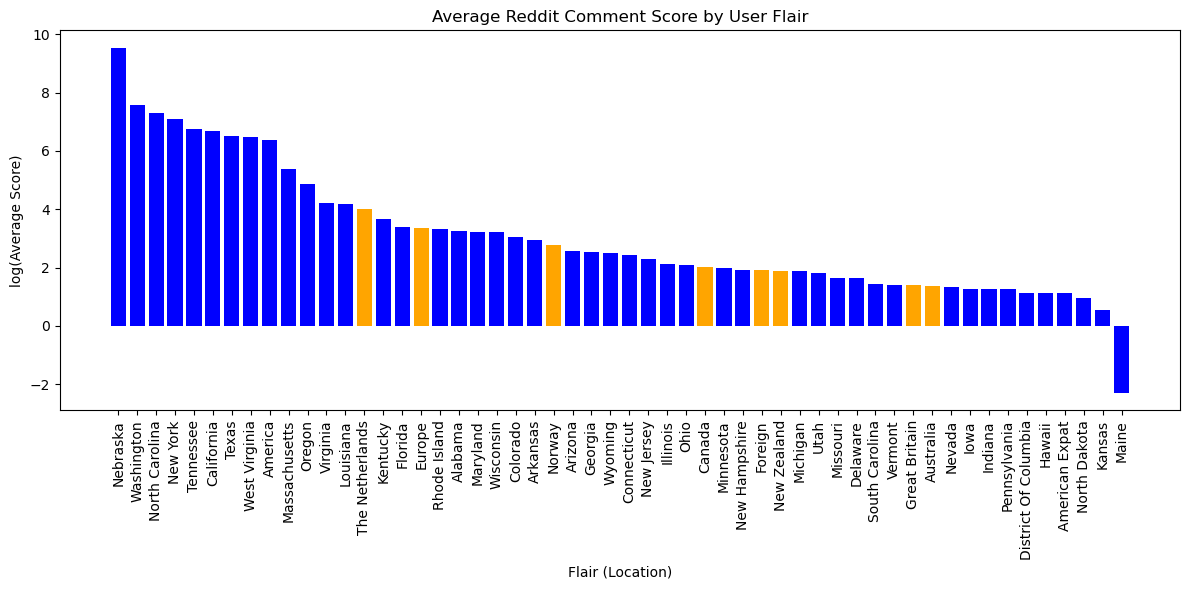

In [42]:
# average score per flair
import statistics
import math

flairs = {}
for utt in reddit_corpus.iter_utterances():
    if utt.meta['subreddit'] == 'politics':
        if utt.meta['author_flair_text'] in flairs:
            flairs[utt.meta['author_flair_text']].append(utt.meta['score'])
        else:
            flairs[utt.meta['author_flair_text']] = [utt.meta['score']]
                           
for flair, scores in sorted(flairs.items(), key=lambda item: statistics.mean(item[1]), reverse=True):
    print(f"{flair}: {statistics.mean(scores)}")
    print(len(scores))

us = {
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming', 'America', 'District Of Columbia', 'American Expat' 
}

flairs = {}
for utt in reddit_corpus.iter_utterances():
    if utt.meta['subreddit'] == 'politics':
        flair = utt.meta['author_flair_text']
        score = utt.meta['score']
        if flair:
            flairs.setdefault(flair, []).append(score)

flair_means = {flair: statistics.mean(scores) for flair, scores in flairs.items()}

sorted_items = sorted(flair_means.items(), key=lambda x: x[1], reverse=True)

flair_labels = [(item[0])[10::] for item in sorted_items]
means = [math.log(item[1]+1.1) for item in sorted_items]
colors = ['blue' if flair in us else 'orange' for flair in flair_labels]

import matplotlib.pyplot as plt

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.bar(flair_labels, means, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Flair (Location)')
plt.ylabel('log(Average Score)')
plt.title('Average Reddit Comment Score by User Flair')
plt.tight_layout()
plt.show()

